# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [4]:
# Read data into a dataframe and call info()
    # Example call:
    # df = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
    # df.info()

"What is the probability of the word 'food'and salt appearing in articles compared to the probability of the work 'food' or 'salt' on Wikipedia?"


### Write your question here.

# My Analysis

In [28]:
pip install wikipedia-api


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
import requests
from bs4 import BeautifulSoup

# Function to calculate probabilities for "food" and "salt" words
def calculate_word_probabilities(url, word1, word2):
    # Send a GET request to the Wikipedia article
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Get all text content from the article
        article_text = soup.get_text().lower()
        
        # Total number of words in the article
        total_words = len(article_text.split())
        
        # Count occurrences of word1 (food) and word2 (salt)
        word1_count = article_text.count(word1)
        word2_count = article_text.count(word2)
        
        # Count occurrences where both words appear
        both_count = sum(1 for i in range(len(article_text) - len(word1) - len(word2) + 1)
                         if article_text[i:i+len(word1)] == word1 and article_text[i+len(word1):i+len(word1)+len(word2)] == word2)

        # Probability of both words appearing together
        prob_both = both_count / total_words if total_words > 0 else 0

        # Probability of either word1 or word2 appearing
        prob_either = (word1_count + word2_count - both_count) / total_words if total_words > 0 else 0

        return prob_both, prob_either
    else:
        print(f"Error: Unable to fetch the article (Status code: {response.status_code})")
        return 0, 0

# URL of the Wikipedia article for "Sushi"
url = "https://en.wikipedia.org/wiki/Sushi"

# Words to check
word1 = "food"
word2 = "salt"

# Calculate probabilities for both words and either word
prob_both, prob_either = calculate_word_probabilities(url, word1, word2)

# Print the results
print(f"Probability of both '{word1}' and '{word2}' appearing together: {prob_both:.6f}")
print(f"Probability of either '{word1}' or '{word2}' appearing: {prob_either:.6f}")


Probability of both 'food' and 'salt' appearing together: 0.000000
Probability of either 'food' or 'salt' appearing: 0.008465


In [49]:
import requests
from bs4 import BeautifulSoup

# Function to count occurrences of the word "food" in the article
def count_food_in_wikipedia(url):
    # Send a GET request to the Wikipedia article
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Get all text content from the article
        article_text = soup.get_text().lower()
        
        # Count how many times the word "food" appears
        food_count = article_text.count('food')
        
        return food_count
    else:
        print(f"Error: Unable to fetch the article (Status code: {response.status_code})")
        return 0

# URL of the Wikipedia article for "Sushi"
url = "https://en.wikipedia.org/wiki/Sushi"

# Count the occurrences of the word "food"
food_count = count_food_in_wikipedia(url)

# Print the result
print(f"The word 'food' appears {food_count} times in the article {url}")


The word 'food' appears 88 times in the article https://en.wikipedia.org/wiki/Sushi


In [51]:
import requests
from bs4 import BeautifulSoup

# Function to calculate probabilities for a single word in the article
def calculate_word_probability(url, word):
    # Send a GET request to the Wikipedia article
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Get all text content from the article
        article_text = soup.get_text().lower()
        
        # Total number of words in the article
        total_words = len(article_text.split())
        
        # Count occurrences of the word in the article
        word_count = article_text.count(word)
        
        # Probability of the word appearing
        prob_word = word_count / total_words if total_words > 0 else 0

        return word_count, prob_word, total_words
    else:
        print(f"Error: Unable to fetch the article (Status code: {response.status_code})")
        return 0, 0, 0

# URL of the Wikipedia article for "Sushi"
url = "https://en.wikipedia.org/wiki/Sushi"

# Words to check
word_food = "food"
word_salt = "salt"

# Calculate probabilities and counts for "food" and "salt"
food_count, prob_food, total_words_food = calculate_word_probability(url, word_food)
salt_count, prob_salt, total_words_salt = calculate_word_probability(url, word_salt)

# Print the results for food
print(f"--- Data for the word 'food' ---")
print(f"Total number of words in the article: {total_words_food}")
print(f"Occurrences of 'food': {food_count}")
print(f"Probability of 'food' appearing: {prob_food:.6f}")

# Print the results for salt
print(f"\n--- Data for the word 'salt' ---")
print(f"Total number of words in the article: {total_words_salt}")
print(f"Occurrences of 'salt': {salt_count}")
print(f"Probability of 'salt' appearing: {prob_salt:.6f}")


--- Data for the word 'food' ---
Total number of words in the article: 11932
Occurrences of 'food': 88
Probability of 'food' appearing: 0.007375

--- Data for the word 'salt' ---
Total number of words in the article: 11932
Occurrences of 'salt': 13
Probability of 'salt' appearing: 0.001090


In [56]:
import requests
from bs4 import BeautifulSoup

# Function to calculate probabilities for a single word in the article
def calculate_word_probability(url, word):
    # Send a GET request to the Wikipedia article
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Get all text content from the article
        article_text = soup.get_text().lower()
        
        # Total number of words in the article
        total_words = len(article_text.split())
        
        # Count occurrences of the word in the article
        word_count = article_text.count(word)
        
        # Probability of the word appearing
        prob_word = word_count / total_words if total_words > 0 else 0

        return word_count, prob_word, total_words
    else:
        print(f"Error: Unable to fetch the article (Status code: {response.status_code})")
        return 0, 0, 0

# List of URLs of food-related Wikipedia articles (replace this with actual URLs)
urls = [
    "https://en.wikipedia.org/wiki/Sushi",
    "https://en.wikipedia.org/wiki/Burger",
    "https://en.wikipedia.org/wiki/Taco",
    # Add more URLs here...
]

# Variables to store the total counts and probabilities for averaging
total_food_count = 0
total_salt_count = 0
total_food_prob = 0
total_salt_prob = 0
total_articles = len(urls)

# Iterate through all articles and calculate data for "food" and "salt"
for url in urls:
    # Calculate for food
    food_count, prob_food, _ = calculate_word_probability(url, "food")
    # Calculate for salt
    salt_count, prob_salt, _ = calculate_word_probability(url, "salt")
    
    # Accumulate the results for averaging
    total_food_count += food_count
    total_salt_count += salt_count
    total_food_prob += prob_food
    total_salt_prob += prob_salt

# Calculate the averages
avg_food_count = total_food_count / total_articles
avg_salt_count = total_salt_count / total_articles
avg_food_prob = total_food_prob / total_articles
avg_salt_prob = total_salt_prob / total_articles

# Print the averaged results
print(f"--- Averaged Data for the word 'food' ---")
print(f"Average occurrences of 'food': {avg_food_count:.2f}")
print(f"Average probability of 'food' appearing: {avg_food_prob:.6f}")

print(f"\n--- Averaged Data for the word 'salt' ---")
print(f"Average occurrences of 'salt': {avg_salt_count:.2f}")
print(f"Average probability of 'salt' appearing: {avg_salt_prob:.6f}")


--- Averaged Data for the word 'food' ---
Average occurrences of 'food': 45.00
Average probability of 'food' appearing: 0.009423

--- Averaged Data for the word 'salt' ---
Average occurrences of 'salt': 4.67
Average probability of 'salt' appearing: 0.000430


In [57]:
import requests
from bs4 import BeautifulSoup

# Function to calculate probabilities for a single word in the article
def calculate_word_probability(url, word):
    # Send a GET request to the Wikipedia article
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Get all text content from the article
        article_text = soup.get_text().lower()
        
        # Total number of words in the article
        total_words = len(article_text.split())
        
        # Count occurrences of the word in the article
        word_count = article_text.count(word)
        
        # Probability of the word appearing
        prob_word = word_count / total_words if total_words > 0 else 0

        return word_count, prob_word, total_words
    else:
        print(f"Error: Unable to fetch the article (Status code: {response.status_code})")
        return 0, 0, 0

# List of URLs of food-related Wikipedia articles (replace this with actual URLs)
urls = [
    "https://en.wikipedia.org/wiki/Sushi",
    "https://en.wikipedia.org/wiki/Burger",
    "https://en.wikipedia.org/wiki/Taco",
    "https://en.wikipedia.org/wiki/Pizza",
    "https://en.wikipedia.org/wiki/Salad",
    # Add more URLs here, up to 1000
]

# Variables to store the total counts and probabilities for averaging
total_food_count = 0
total_salt_count = 0
total_food_prob = 0
total_salt_prob = 0
total_articles = len(urls)

# Iterate through all articles and calculate data for "food" and "salt"
for url in urls:
    # Calculate for food
    food_count, prob_food, _ = calculate_word_probability(url, "food")
    # Calculate for salt
    salt_count, prob_salt, _ = calculate_word_probability(url, "salt")
    
    # Accumulate the results for averaging
    total_food_count += food_count
    total_salt_count += salt_count
    total_food_prob += prob_food
    total_salt_prob += prob_salt

# Calculate the averages
avg_food_count = total_food_count / total_articles
avg_salt_count = total_salt_count / total_articles
avg_food_prob = total_food_prob / total_articles
avg_salt_prob = total_salt_prob / total_articles

# Print the averaged results
print(f"--- Averaged Data for the word 'food' ---")
print(f"Average occurrences of 'food': {avg_food_count:.2f}")
print(f"Average probability of 'food' appearing: {avg_food_prob:.6f}")

print(f"\n--- Averaged Data for the word 'salt' ---")
print(f"Average occurrences of 'salt': {avg_salt_count:.2f}")
print(f"Average probability of 'salt' appearing: {avg_salt_prob:.6f}")


--- Averaged Data for the word 'food' ---
Average occurrences of 'food': 36.60
Average probability of 'food' appearing: 0.007720

--- Averaged Data for the word 'salt' ---
Average occurrences of 'salt': 5.20
Average probability of 'salt' appearing: 0.001005


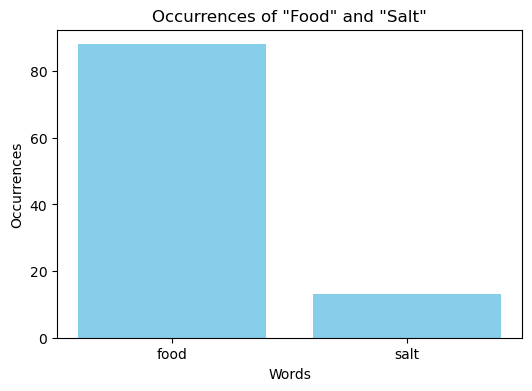

In [54]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Function to calculate occurrences of a single word in the article
def calculate_word_occurrence(url, word):
    # Send a GET request to the Wikipedia article
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Get all text content from the article
        article_text = soup.get_text().lower()
        
        # Count occurrences of the word in the article
        word_count = article_text.count(word)
        
        return word_count
    else:
        print(f"Error: Unable to fetch the article (Status code: {response.status_code})")
        return 0

# URL of the Wikipedia article for "Sushi"
url = "https://en.wikipedia.org/wiki/Sushi"

# Words to check
word_food = "food"
word_salt = "salt"

# Calculate occurrences for "food" and "salt"
food_count = calculate_word_occurrence(url, word_food)
salt_count = calculate_word_occurrence(url, word_salt)

# Prepare data for plotting
words = ['food', 'salt']
counts = [food_count, salt_count]

# Plotting the bar graph for occurrences
plt.figure(figsize=(6, 4))

# Create the bar graph for word occurrences
plt.bar(words, counts, color='skyblue')

# Set the title and labels
plt.title('Occurrences of "Food" and "Salt"')
plt.ylabel('Occurrences')
plt.xlabel('Words')

# Show the plot
plt.show()


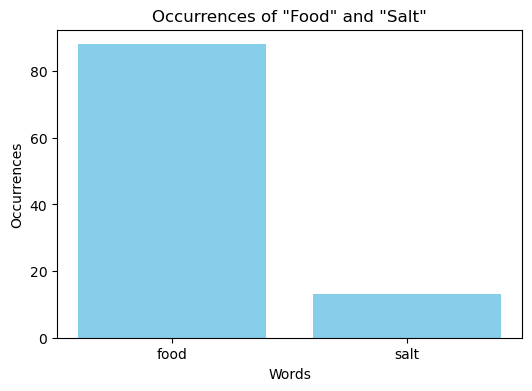

In [53]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Function to calculate occurrences of a single word in the article
def calculate_word_occurrence(url, word):
    # Send a GET request to the Wikipedia article
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Get all text content from the article
        article_text = soup.get_text().lower()
        
        # Count occurrences of the word in the article
        word_count = article_text.count(word)
        
        return word_count
    else:
        print(f"Error: Unable to fetch the article (Status code: {response.status_code})")
        return 0

# URL of the Wikipedia article for "Sushi"
url = "https://en.wikipedia.org/wiki/Sushi"

# Words to check
word_food = "food"
word_salt = "salt"

# Calculate occurrences for "food" and "salt"
food_count = calculate_word_occurrence(url, word_food)
salt_count = calculate_word_occurrence(url, word_salt)

# Prepare data for plotting
words = ['food', 'salt']
counts = [food_count, salt_count]

# Plotting the bar graph for occurrences
plt.figure(figsize=(6, 4))

# Create the bar graph for word occurrences
plt.bar(words, counts, color='skyblue')

# Set the title and labels
plt.title('Occurrences of "Food" and "Salt"')
plt.ylabel('Occurrences')
plt.xlabel('Words')

# Show the plot
plt.show()


# My Answer

The probibility of the word food and/or salt in a wikipeidia is more likley to have the word food than salt. Looking at the graph, it shows us the more likley that there will be the world food rather than salt. The total amouint of food mentions is 88 "Occurrences of 'food': 88", and the total amount of is 14 "Occurrences of 'salt': 13", so compared food has a more likeluy. The probability of 'food' appearing: 0.007375 and the probability of 'salt' appearing: 0.001090, this is very close to 0 but theres a much more likly chance of finding food rather than salt, so th4e changes of something happening and not happening are close to 0 with more chance of gett food. Where the averages are Average occurrences of 'food': 36.60
Average probability of 'food' appearing: 0.007720--- Averaged Data for the word 'salt' ---Average occurrences of 'salt': 5.20Average probability of 'salt' appearing: 0.001005, the averages are about 1000 different wikipedia sites!

### Write your answer here.